In [1]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image, ImageOps
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/fashion-mnist.csv")
df_labels = df.pop('label')
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, test_size=0.2)
X_train.shape, X_test.shape

((8000, 784), (2000, 784))

In [3]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)
print("Perceptron accuracy: ", accuracy_score(y_test, clf.predict(X_test)))

Perceptron accuracy:  0.798


Iteration 1, loss = 10.68320213
Iteration 2, loss = 4.30428155
Iteration 3, loss = 2.95124616
Iteration 4, loss = 2.33352392
Iteration 5, loss = 1.70174016
Iteration 6, loss = 1.21376196
Iteration 7, loss = 1.10484515
Iteration 8, loss = 0.86087824
Iteration 9, loss = 0.78116457
Iteration 10, loss = 0.69854228
Iteration 11, loss = 0.53981875
Iteration 12, loss = 0.56619232
Iteration 13, loss = 0.50044239
Iteration 14, loss = 0.64254443
Iteration 15, loss = 0.37302018
Iteration 16, loss = 0.34451479
Iteration 17, loss = 0.32141889
Iteration 18, loss = 0.27505359
Iteration 19, loss = 0.27734430
Iteration 20, loss = 0.22575379
Multilayer Perceptron Accuracy:  0.83


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


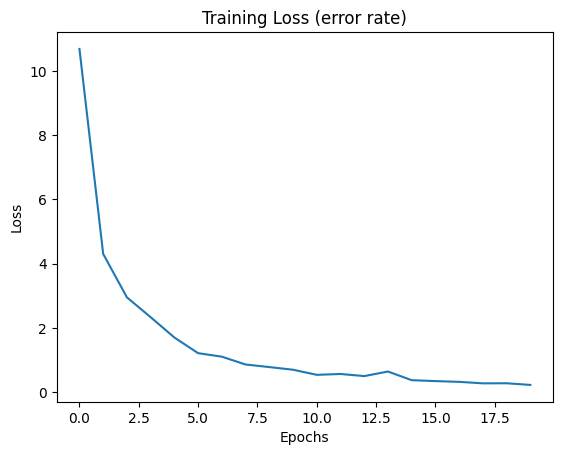

In [5]:
model = MLPClassifier(hidden_layer_sizes=(512, 256), max_iter=20, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Multilayer Perceptron Accuracy: ", accuracy_score(y_test, y_pred))

plt.plot(model.loss_curve_)
plt.title('Training Loss (error rate)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predicted class:  Trouser


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


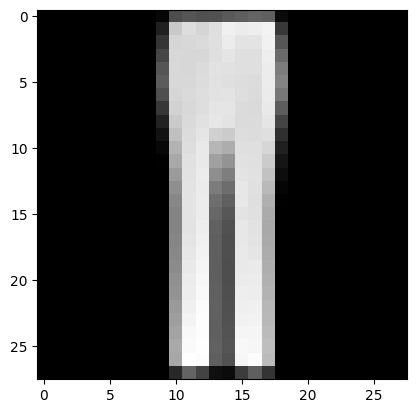

In [9]:
def predict_from_b64(b_str):
    img_data = base64.b64decode(b_str)

    img = Image.open(BytesIO(img_data)).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img_arr = np.array(img).reshape(-1) / 255.0
    return model.predict([img_arr])[0], img
classes = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
b64_str = input("Input the base64 string of the image (bit.ly/b64encode); ")
prediction, image = predict_from_b64(b64_str)
print("Predicted class: ", classes[prediction])

plt.imshow(image, cmap='gray')
plt.show()